In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set style for the plots
plt.style.use('seaborn-v0_8')

In [2]:
df = pd.read_csv('../data/raw/water_levels.csv', sep=';', decimal=',')
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)
# Resample to daily averages
df = df.resample("D").mean().round(2)
df.to_csv('../data/processed/water_levels_daily.csv')
df

,value
timestamp,
2000-01-01,239.62
2000-01-02,239.42
2000-01-03,239.18
2000-01-04,239.09
2000-01-05,239.08
...,...
2025-04-20,241.43
2025-04-21,241.41
2025-04-22,241.22


In [4]:
max = 245
min = 205

df['percentage'] = (df['value'] - min) / (max - min) * 100
df

,value,percentage
timestamp,,
2000-01-01,239.62,86.550
2000-01-02,239.42,86.050
2000-01-03,239.18,85.450
2000-01-04,239.09,85.225
2000-01-05,239.08,85.200
...,...,...
2025-04-20,241.43,91.075
2025-04-21,241.41,91.025
2025-04-22,241.22,90.550


In [17]:
df.describe()

,value
count,9246.000000
mean,237.475651
std,7.579526
min,217.820000
25%,233.922500
50%,240.300000
75%,243.500000
max,245.260000


In [18]:
# Add year, month and dayofyear columns for seasonality and trend analysis
df['year'] = df.index.year
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear

# Find the minimum value and its date
min_value = df['value'].min()
min_date = df['value'].idxmin()
print(f"Minimum Water Level: {min_value:.2f} occurred on {min_date.strftime('%Y-%m-%d')}")

# Find the maximum value and its date
max_value = df['value'].max()
max_date = df['value'].idxmax()
print(f"Maximum Water Level: {max_value:.2f} occurred on {max_date.strftime('%Y-%m-%d')}")

Minimum Water Level: 217.82 occurred on 2018-10-29
Maximum Water Level: 245.26 occurred on 2002-05-07


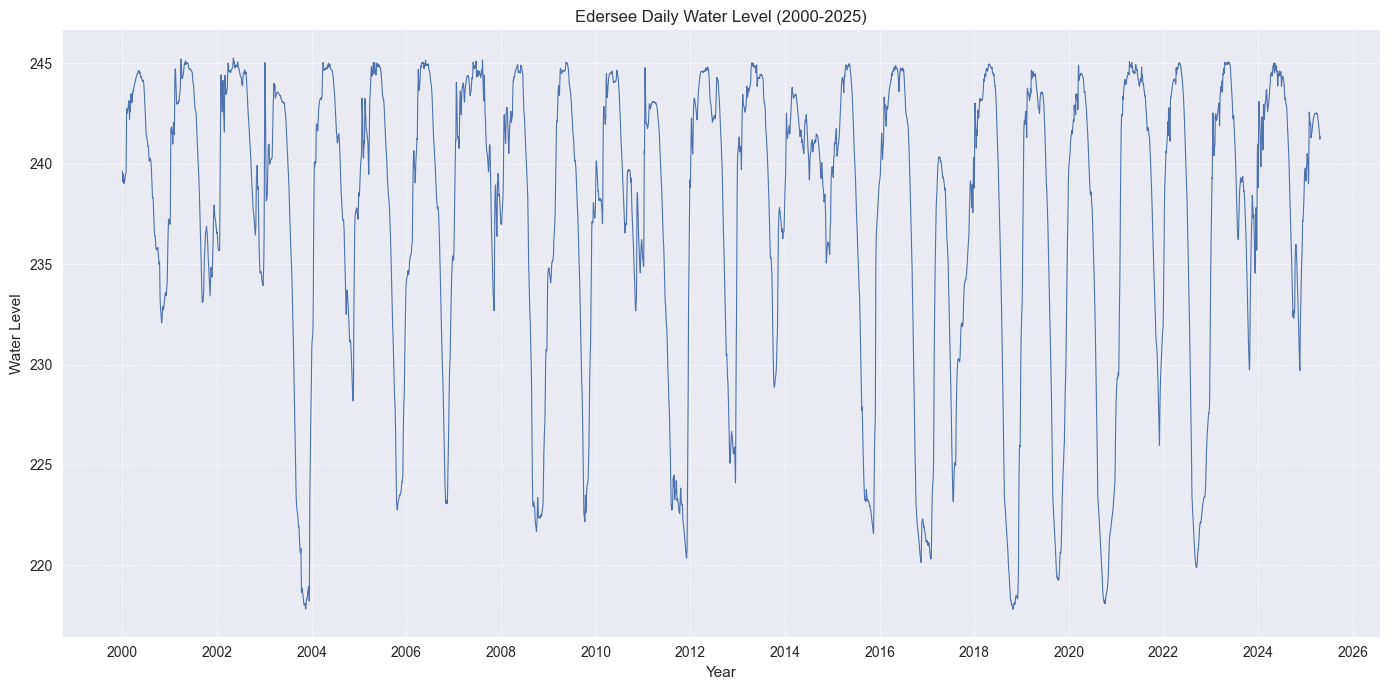

In [19]:
# Plot the full time series
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['value'], label='Daily Water Level', linewidth=0.8)

# Formatting the plot
plt.title('Edersee Daily Water Level (2000-2025)')
plt.xlabel('Year')
plt.ylabel('Water Level')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2)) # Tick every 2 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()

# Show plot
plt.show()

<Figure size 1200x600 with 0 Axes>

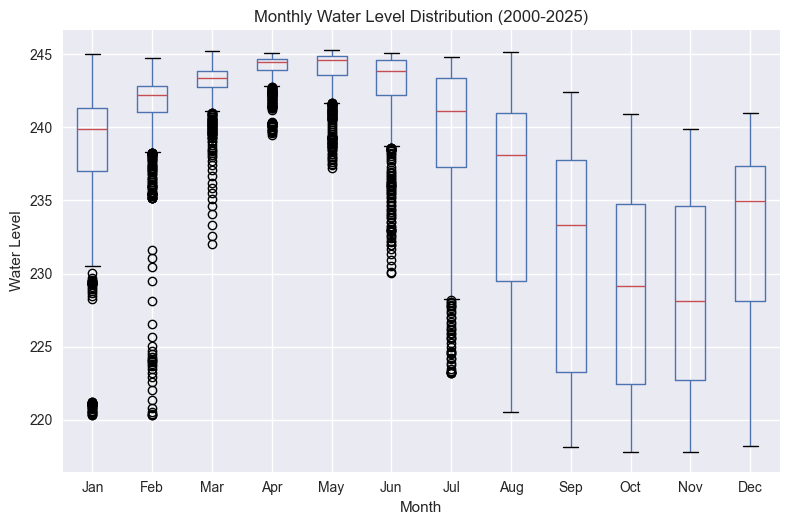

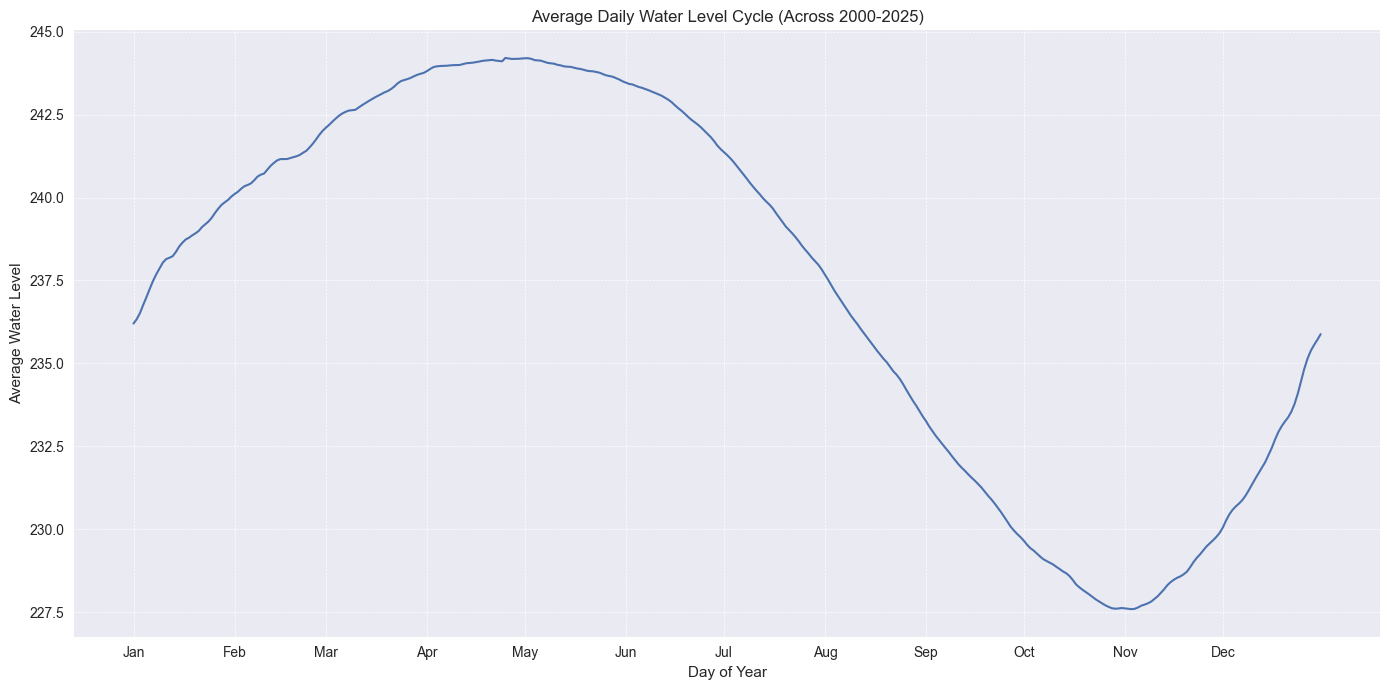

In [20]:
# Plot 1: Box plot showing distribution by month
plt.figure(figsize=(12, 6))
df.boxplot(column='value', by='month', grid=True)
plt.title('Monthly Water Level Distribution (2000-2025)')
plt.suptitle('') # Remove default suptitle
plt.xlabel('Month')
plt.ylabel('Water Level')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Plot 2: Average daily water level across the years
plt.figure(figsize=(14, 7))
daily_avg = df.groupby('dayofyear')['value'].mean()
# Handle leap year day 366 if present (usually small N, can skew mean)
if 366 in daily_avg.index:
     daily_avg = daily_avg.drop(366) # Drop day 366 for smoother plot

daily_avg.plot(linewidth=1.5)
plt.title('Average Daily Water Level Cycle (Across 2000-2025)')
plt.xlabel('Day of Year')
plt.ylabel('Average Water Level')
plt.grid(True, linestyle='--', linewidth=0.5)
# Add labels for months approximately
month_starts = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_starts, month_names)
plt.tight_layout()
plt.show()

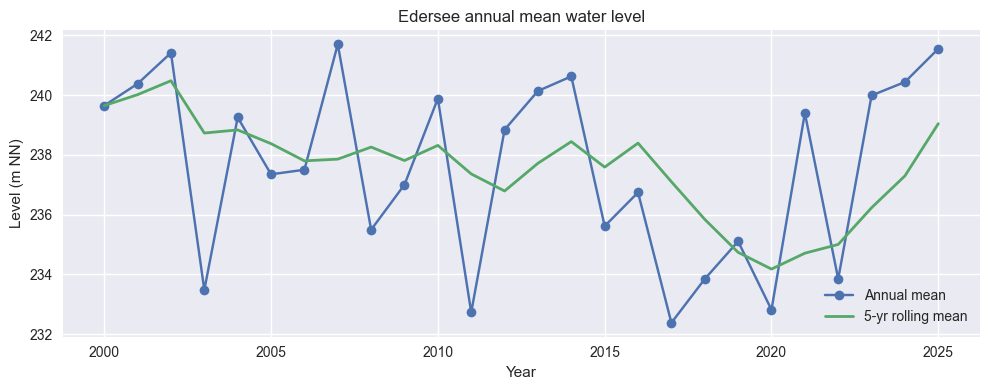

In [21]:
# Annual mean series
annual = df.groupby('year')['value'].mean()

# ---------- Visual check ----------
plt.figure(figsize=(10, 4))
plt.plot(annual.index, annual.values, marker='o', label='Annual mean')
plt.plot(annual.index, annual.rolling(5, min_periods=1).mean(), lw=2, label='5-yr rolling mean')
plt.title('Edersee annual mean water level')
plt.xlabel('Year')
plt.ylabel('Level (m NN)')
plt.legend()
plt.tight_layout()
plt.show()